In [2]:
# principal component analysis
# rows are observations, CLC for whole season
# predicting CLC
# Each column of matrix is airport
# Row is hourly observation 4

In [11]:
# external imports
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# my imports
from Airport_CLC_Calculation import *
from Timeseries_Graphing import *
from Bar_Plotting import *
from Box_Plotting import *

Explained Variance Ratio:
   Principal Component  Explained Variance Ratio
0                    1                  0.373352
1                    2                  0.142531


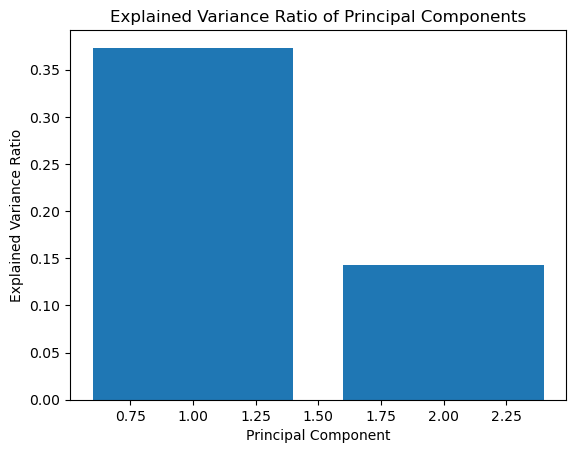

In [15]:
# get table with airports for columns and rows for observations?
# /Users/ginoangelici/Projects/Scripps/Coastal-Low-Cloudiness/CLC_Data/Avg_Tables/Airport_CLC_Summary_Table_Years_1950_to_2023_Months_May_June_July_August_September_Hours_7_10_13_16_Elevation_Definition_1000.csv
# made during table creation ^

df_1 = pd.read_csv("CLC_Data/Avg_Tables/Airport_CLC_Summary_Table_Years_1950_to_2023_Months_May_June_July_August_September_Hours_7_10_13_16_Elevation_Definition_1000.csv")
df_1.drop(columns=df_1.columns[0], axis=1,  inplace=True)
df_1 = df_1.fillna(df_1.mean())

features = ["PADK", "PACD", "PADQ", "PAHO", "PYAK", "KSIT", \
"PANT", "CYAZ", "KAST", "KOTH", "KACV", "KOAK", "KSFO", "KMRY", "KVBG", "KNTD", "KLAX", "KLGB", "KSAN", "KNZY", "KNSI", "KNUC"]

x = df_1[features].values
x = StandardScaler().fit_transform(x)

n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(x)

explained_variance_ratio = pca.explained_variance_ratio_

explained_variance_df = pd.DataFrame({'Principal Component': range(1, n_components + 1),
                                      'Explained Variance Ratio': explained_variance_ratio})

print("Explained Variance Ratio:")
print(explained_variance_df)

plt.figure()
plt.bar(range(1, n_components + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()